In [1]:
## Machine Learning with R by Brett Lantz
## Chapter 10: Evaluating model performance

In [2]:
sms_results <- read.csv("sms_results.csv")
head(sms_results)

,actual_type,predict_type,prob_spam
1,spam,spam,1
2,ham,ham,0.00136434
3,ham,ham,8.751898e-06
4,ham,ham,4.854477e-08
5,ham,ham,8.667503e-05
6,ham,ham,4.572569e-06


In [3]:
head(subset(sms_results, actual_type != predict_type))

,actual_type,predict_type,prob_spam
45,spam,ham,0.006475778
54,ham,spam,0.940526
88,spam,ham,0.09959125
104,spam,ham,0.4553965
130,spam,ham,0.02055777
205,spam,ham,0.05379267


In [4]:
#Confusion matrix
table(sms_results$actual_type, sms_results$predict_type)

      
        ham spam
  ham  1216    6
  spam   28  155

In [6]:
install.packages("gmodels", repos = "https://cran.r-project.org")
library(gmodels)

package 'gmodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpKSCUsO\downloaded_packages


Warning message:
: package 'gmodels' was built under R version 3.2.5

In [7]:
#Build confusion matrix with much more details
CrossTable(sms_results$actual_type, sms_results$predict_type)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1405 

 
                        | sms_results$predict_type 
sms_results$actual_type |       ham |      spam | Row Total | 
------------------------|-----------|-----------|-----------|
                    ham |      1216 |         6 |      1222 | 
                        |    16.603 |   128.287 |           | 
                        |     0.995 |     0.005 |     0.870 | 
                        |     0.977 |     0.037 |           | 
                        |     0.865 |     0.004 |           | 
------------------------|-----------|-----------|-----------|
                   spam |        28 |       155 |       183 | 
                        |   110.869 |   856.649 |           | 
                        |     0.153 |     0.847 |     0.130 | 

In [12]:
#Compute accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy_rate <- (155 + 1216) / (155 + 1216 + 6 +28)
accuracy_rate

[1] 0.9758007

In [14]:
#Compute error rate: (FP + FN) / (TP + TN + FP + FN)
error_rate <- (6 + 28) / (155 + 1216 + 6 + 28)
error_rate

#Or
1 - accuracy_rate

[1] 0.02419929

[1] 0.02419929

In [15]:
#Beyond accuracy - other measures of performance

In [16]:
install.packages("caret", repos = "https://cran.r-project.org")
library(caret)

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpKSCUsO\downloaded_packages


Warning message:
: package 'caret' was built under R version 3.2.5Loading required package: lattice
Loading required package: ggplot2
Warning message:
: package 'ggplot2' was built under R version 3.2.4

In [17]:
confusionMatrix(sms_results$predict_type, sms_results$actual_type, positive = "spam")

Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1216   28
      spam    6  155
                                          
               Accuracy : 0.9758          
                 95% CI : (0.9663, 0.9832)
    No Information Rate : 0.8698          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8874          
 Mcnemar's Test P-Value : 0.0003164       
                                          
            Sensitivity : 0.8470          
            Specificity : 0.9951          
         Pos Pred Value : 0.9627          
         Neg Pred Value : 0.9775          
             Prevalence : 0.1302          
         Detection Rate : 0.1103          
   Detection Prevalence : 0.1146          
      Balanced Accuracy : 0.9210          
                                          
       'Positive' Class : spam            
                                          

In [18]:
#Computing Kappa manually
pr_a <- 0.865 + 0.111
pr_a

[1] 0.976

In [21]:
pr_e <- 0.868 * 0.886 + 0.132 * 0.114
pr_e

[1] 0.784096

In [22]:
k <- (pr_a - pr_e) / (1 - pr_e)
k

[1] 0.8888395

In [23]:
#Computing Kappa automatically
install.packages("vcd", repos = "https://cran.r-project.org")
library(vcd)

also installing the dependency 'lmtest'



package 'lmtest' successfully unpacked and MD5 sums checked
package 'vcd' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpKSCUsO\downloaded_packages


Warning message:
: package 'vcd' was built under R version 3.2.5Loading required package: grid


In [24]:
Kappa(table(sms_results$actual_type, sms_results$predict_type))

            value     ASE     z Pr(>|z|)
Unweighted 0.8874 0.01898 46.76        0
Weighted   0.8874 0.01898 46.76        0

In [29]:
#Kappa2 is used to calculate kappa from vectors of predicted and actual values stored in a data frame.
install.packages("irr", repos = "https://cran.r-project.org")
library(irr)

package 'irr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpKSCUsO\downloaded_packages


Loading required package: lpSolve


In [30]:
kappa2(sms_results[1:2])

 Cohen's Kappa for 2 Raters (Weights: unweighted)

 Subjects = 1405 
   Raters = 2 
    Kappa = 0.887 

        z = 33.4 
  p-value = 0 

In [31]:
#Sensitivity (true positive rate) TP / (TP + FN)
sens <- 154 / (154 + 29)
sens

[1] 0.8415301

In [32]:
#Specificity (true negative rate) TN / (TN + FP)
spec <- 1202 / (1202 + 5)
spec

[1] 0.9958575

In [35]:
#Compute sensitivity and specificity by caret package
sensitivity(sms_results$predict_type, sms_results$actual_type, positive = "spam")
specificity(sms_results$predict_type, sms_results$actual_type, negative = "ham")

[1] 0.8469945

[1] 0.99509

In [37]:
#Precision (positive predicted value) TP / (TP + FP)
prec <- 154 / (154 + 5)
prec

[1] 0.9685535

In [38]:
#Recall (same as sensitivity, interpretation differs)
rec <- 154 / (154 + 29)
rec

[1] 0.8415301

In [39]:
#Compute precision with caret package
posPredValue(sms_results$predict_type, sms_results$actual_type, positive = "spam")

[1] 0.9627329

In [42]:
#F-measure (combine precision and recall also called F1 or F-score)
f <- (2 * prec * rec) / (prec + rec)
f

[1] 0.9005848

In [43]:
#Visualizing performance tradeoffs
install.packages("ROCR", repos = "https://cran.r-project.org")
library(ROCR)

also installing the dependencies 'caTools', 'gplots'



package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpKSCUsO\downloaded_packages


Warning message:
: package 'ROCR' was built under R version 3.2.5Loading required package: gplots
Warning message:
: package 'gplots' was built under R version 3.2.5
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [47]:
pred <- prediction(predictions = sms_results$prob_spam, labels = sms_results$actual_type)

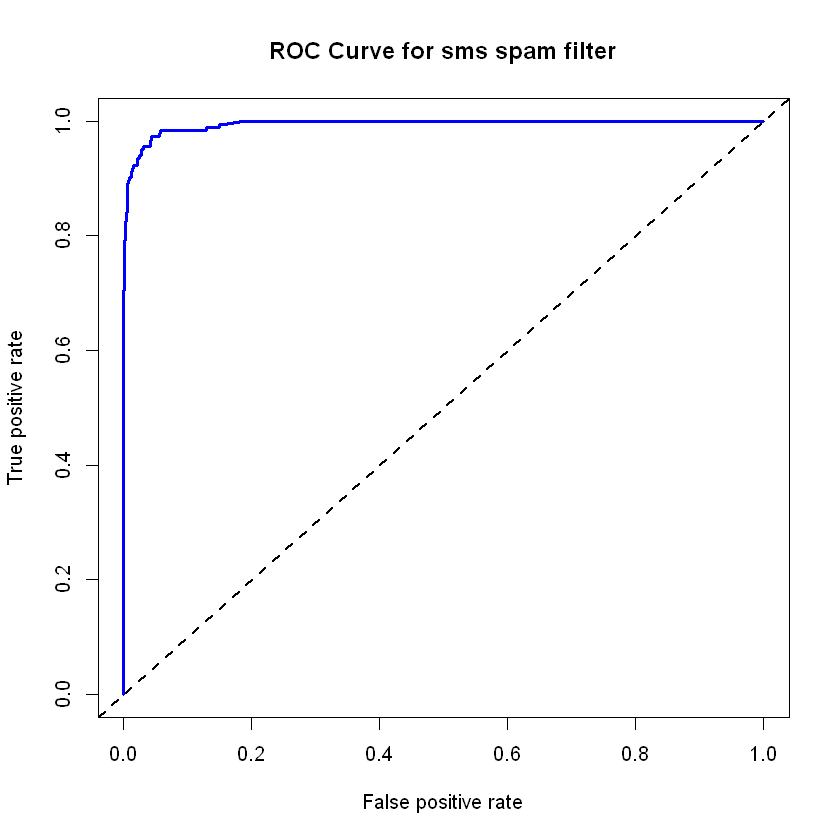

In [54]:
#ROC Curves
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf, main = "ROC Curve for sms spam filter", col = "blue", lwd = 3)
abline(a = 0, b = 1, lwd = 2, lty = 2)

In [56]:
#Compute area under the curve
perf.auc <- performance(pred, measure = "auc")
str(perf.auc)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "None"
  ..@ y.name      : chr "Area under the ROC curve"
  ..@ alpha.name  : chr "none"
  ..@ x.values    : list()
  ..@ y.values    :List of 1
  .. ..$ : num 0.995
  ..@ alpha.values: list()


In [58]:
unlist(perf.auc@y.values)

[1] 0.9945556

In [60]:
#Estimating future performance
#What if we have small dataset and don't want to split it into training and test set?
#The holdout method

credit <- read.csv("credit.csv")
head(credit)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,ellip.h,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
1,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,<8b>,real estate,67,none,own,2,skilled employee,1,yes,yes,1
2,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,<8b>,real estate,22,none,own,1,skilled employee,1,none,yes,2
3,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,<8b>,real estate,49,none,own,1,unskilled resident,2,none,yes,1
4,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,<8b>,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
5,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,<8b>,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2
6,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,<8b>,unknown/none,35,none,for free,1,unskilled resident,2,yes,yes,1


In [65]:
random_ids <- order(runif(1000))
credit_train <- credit[random_ids[1:500],]
credit_validate <- credit[random_ids[501:750],]
credit_test <- credit[random_ids[751:1000],]

prop.table(table(credit_train$default))
prop.table(table(credit_validate$default))
prop.table(table(credit_test$default))
#a problem with spliting the dataset could be different proportion classes and if not present on training set model won't learn
#this class


   1    2 
0.71 0.29 


    1     2 
0.672 0.328 


    1     2 
0.708 0.292 

In [66]:
#Stratified random sampling using caret package
in_train <- createDataPartition(credit$default, p = 0.75, list = FALSE)
credit_train <- credit[in_train,]
credit_test <- credit[-in_train,]

prop.table(table(credit_train$default))
prop.table(table(credit_test$default))


    1     2 
0.708 0.292 


    1     2 
0.676 0.324 

In [68]:
#Cross-validation (repeated holdout method or k-fold cross-validation) (in caret package)
folds <- createFolds(credit$default, k = 10)
str(folds)

List of 10
 $ Fold01: int [1:100] 8 39 55 67 99 102 114 131 153 158 ...
 $ Fold02: int [1:100] 12 23 26 42 47 82 91 92 105 122 ...
 $ Fold03: int [1:100] 18 33 48 53 60 61 62 66 68 69 ...
 $ Fold04: int [1:100] 1 6 7 11 13 22 25 34 37 38 ...
 $ Fold05: int [1:100] 28 35 43 46 50 77 88 90 95 98 ...
 $ Fold06: int [1:100] 3 4 16 19 49 51 52 72 76 81 ...
 $ Fold07: int [1:100] 21 29 32 36 56 87 94 128 141 173 ...
 $ Fold08: int [1:100] 5 10 15 20 27 44 73 75 101 119 ...
 $ Fold09: int [1:100] 17 24 30 31 45 54 65 71 79 80 ...
 $ Fold10: int [1:100] 2 9 14 41 59 64 78 96 100 108 ...


In [69]:
credit01_train <- credit[folds$Fold01,]
credit01_test <- credit[-folds$Fold01,]

In [74]:
#Full example with C5.0 and Kappa 
install.packages("C5.0", repos = "https://cran.r-project.org")
library(C50)
set.seed(123)
credit$default <- as.factor(credit$default)
folds <- createFolds(credit$default, k =10)

Warning message:
: package 'C5.0' is not available (for R version 3.2.3)

In [75]:
cv_results <- lapply(folds, function(x) {
    
    credit_train <- credit[x,]
    credit_test <- credit[-x,]
    credit_model <- C5.0(default ~ ., data = credit_train)
    credit_pred <- predict(credit_model, credit_test)
    credit_actual <- credit_test$default
    
    kappa <- kappa2(data.frame(credit_actual, credit_pred))$value
    
    return (kappa)
})

In [76]:
str(cv_results)

List of 10
 $ Fold01: num 0.201
 $ Fold02: num 0.0937
 $ Fold03: num 0.261
 $ Fold04: num 0.164
 $ Fold05: num 0.243
 $ Fold06: num 0.269
 $ Fold07: num 0.0901
 $ Fold08: num 0.194
 $ Fold09: num 0.15
 $ Fold10: num 0.143


In [77]:
mean(unlist(cv_results))

[1] 0.1809503

In [ ]:
#Bootstrap sampling
#it differs from k cross validations because it uses sampling with replacement